In [37]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np
import os

In [71]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shashanknecrothapa/ames-housing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ames-housing-dataset


In [93]:

csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]

if csv_files:
    first_csv = os.path.join(path, csv_files[0])
    try:
        df = pd.read_csv(first_csv)
    except pd.errors.ParserError as e:
        print(f"Error reading CSV file: {e}")
    except FileNotFoundError:
      print(f"File not found: {first_csv}")
else:
    print("No CSV files found in the specified directory.")


In [73]:
df.shape # this means that we have 2930 rows and 81 features

(2930, 82)

In [94]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [75]:
# Check all the rows
df.info()         # Structure: column names, non-null counts, data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [76]:
df.describe()     # Stats: mean, std, min, max, quartiles for numerical columns

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [77]:
df.dtypes         # Data types of each column

,0
Order,int64
PID,int64
MS SubClass,int64
MS Zoning,object
Lot Frontage,float64
...,...
Mo Sold,int64
Yr Sold,int64
Sale Type,object
Sale Condition,object


In [78]:
df.isnull().sum() # Missing values per column

,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,490
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [95]:
# Total number of missing values
df.isnull().sum().sum()

np.int64(15749)

#Handling the missing values

In [80]:
cols_with_missing = df.columns[df.isnull().any()]

# Print the columns with missing values
cols_with_missing


Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')

In [81]:
missing_values = df.isnull().sum()

columns_with_missing_values = missing_values[missing_values > 0]

# Print the columns with missing values, their counts, and data types
if not columns_with_missing_values.empty:
    print("Columns with missing values:")
    for col, count in columns_with_missing_values.items():
        print(f"- {col}: {count} missing values, data type: {df[col].dtype}")
else:
    print("No columns with missing values found.")


Columns with missing values:
- Lot Frontage: 490 missing values, data type: float64
- Alley: 2732 missing values, data type: object
- Mas Vnr Type: 1775 missing values, data type: object
- Mas Vnr Area: 23 missing values, data type: float64
- Bsmt Qual: 80 missing values, data type: object
- Bsmt Cond: 80 missing values, data type: object
- Bsmt Exposure: 83 missing values, data type: object
- BsmtFin Type 1: 80 missing values, data type: object
- BsmtFin SF 1: 1 missing values, data type: float64
- BsmtFin Type 2: 81 missing values, data type: object
- BsmtFin SF 2: 1 missing values, data type: float64
- Bsmt Unf SF: 1 missing values, data type: float64
- Total Bsmt SF: 1 missing values, data type: float64
- Electrical: 1 missing values, data type: object
- Bsmt Full Bath: 2 missing values, data type: float64
- Bsmt Half Bath: 2 missing values, data type: float64
- Fireplace Qu: 1422 missing values, data type: object
- Garage Type: 157 missing values, data type: object
- Garage Yr Blt

Refer to this link https://jse.amstat.org/v19n3/decock/DataDocumentation.txt and handle the missing values based on it

In [96]:
df['Lot Frontage'].fillna(df['Lot Frontage'].mean(), inplace = True)
df['Alley'].fillna('NA', inplace = True)
df['Mas Vnr Type'].fillna('NA', inplace = True)
df['Mas Vnr Area'].fillna(0, inplace = True)
df['Bsmt Qual'].fillna('NA', inplace = True)
df['Bsmt Cond'].fillna('NA', inplace = True)
df['Bsmt Exposure'].fillna('NA', inplace = True)
df['BsmtFin Type 1'].fillna('NA', inplace = True)
df['BsmtFin SF 1'].fillna(0, inplace = True)

df['BsmtFin Type 2'].fillna('NA', inplace = True)
df['BsmtFin SF 2'].fillna(0, inplace = True)
df['Bsmt Unf SF'].fillna(0, inplace = True)
df['Total Bsmt SF'].fillna(0, inplace = True)

df['Electrical'].fillna('NA', inplace = True)
df['Bsmt Full Bath'].fillna(0, inplace = True)
df['Bsmt Half Bath'].fillna(0, inplace = True)
df['Fireplace Qu'].fillna('NA', inplace = True)

df['Garage Type'].fillna('NA', inplace = True)
df['Garage Yr Blt'].fillna(df['Garage Yr Blt'].mean(), inplace = True)
df['Garage Finish'].fillna('NA', inplace = True)
df['Garage Cars'].fillna(0, inplace = True)

df['Garage Area'].fillna(0, inplace = True)
df['Garage Qual'].fillna('NA', inplace = True)
df['Garage Cond'].fillna('NA', inplace = True)
df['Pool QC'].fillna('NA', inplace = True)
df['Fence'].fillna('NA', inplace = True)
df['Misc Feature'].fillna('NA', inplace = True)


<ipython-input-96-0fb8e5a6a317>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lot Frontage'].fillna(df['Lot Frontage'].mean(), inplace = True)
<ipython-input-96-0fb8e5a6a317>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [97]:
df.isnull().sum().sum()

np.int64(0)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [99]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)


MS Zoning
Street
Alley
Lot Shape
Land Contour
Utilities
Lot Config
Land Slope
Neighborhood
Condition 1
Condition 2
Bldg Type
House Style
Roof Style
Roof Matl
Exterior 1st
Exterior 2nd
Mas Vnr Type
Exter Qual
Exter Cond
Foundation
Bsmt Qual
Bsmt Cond
Bsmt Exposure
BsmtFin Type 1
BsmtFin Type 2
Heating
Heating QC
Central Air
Electrical
Kitchen Qual
Functional
Fireplace Qu
Garage Type
Garage Finish
Garage Qual
Garage Cond
Paved Drive
Pool QC
Fence
Misc Feature
Sale Type
Sale Condition


In [100]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Order            2930 non-null   int64   
 1   PID              2930 non-null   int64   
 2   MS SubClass      2930 non-null   int64   
 3   MS Zoning        2930 non-null   category
 4   Lot Frontage     2930 non-null   float64 
 5   Lot Area         2930 non-null   int64   
 6   Street           2930 non-null   category
 7   Alley            2930 non-null   category
 8   Lot Shape        2930 non-null   category
 9   Land Contour     2930 non-null   category
 10  Utilities        2930 non-null   category
 11  Lot Config       2930 non-null   category
 12  Land Slope       2930 non-null   category
 13  Neighborhood     2930 non-null   category
 14  Condition 1      2930 non-null   category
 15  Condition 2      2930 non-null   category
 16  Bldg Type        2930 non-null   category


In [102]:
from sklearn.preprocessing import MinMaxScaler

df_normalised = df.copy()

numerical_cols = df_normalised.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()
df_normalised[numerical_cols] = scaler.fit_transform(df_normalised[numerical_cols])

In [103]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df_normalised.select_dtypes(include=['category']).columns

label_encoder = LabelEncoder()
for col in categorical_cols:
    df_normalised[col] = label_encoder.fit_transform(df_normalised[col])


In [104]:
df_normalised.shape

(2930, 82)

In [105]:
df_normalised.describe()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,0.500000,0.391356,0.219926,4.967235,0.165153,0.041356,0.995904,0.985666,1.940273,2.777816,...,0.002804,2.994198,3.494881,2.064846,0.002979,0.474186,0.447611,8.358703,3.779863,0.226360
std,0.288823,0.392536,0.250812,0.865652,0.073019,0.036832,0.063876,0.259604,1.412105,0.703199,...,0.044496,0.131827,1.090075,0.364749,0.033314,0.246772,0.329153,1.877433,1.076299,0.107633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.004526,0.000000,5.000000,0.133562,0.028700,1.000000,1.000000,0.000000,3.000000,...,0.000000,3.000000,4.000000,2.000000,0.000000,0.272727,0.250000,9.000000,4.000000,0.157248
50%,0.500000,0.019036,0.176471,5.000000,0.165153,0.038031,1.000000,1.000000,3.000000,3.000000,...,0.000000,3.000000,4.000000,2.000000,0.000000,0.454545,0.500000,9.000000,4.000000,0.198341
75%,0.750000,0.792181,0.294118,5.000000,0.195205,0.047934,1.000000,1.000000,3.000000,3.000000,...,0.000000,3.000000,4.000000,2.000000,0.000000,0.636364,0.750000,9.000000,4.000000,0.270423
max,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000,...,1.000000,4.000000,4.000000,5.000000,1.000000,1.000000,1.000000,9.000000,5.000000,1.000000


#Data visualisation and feature selection

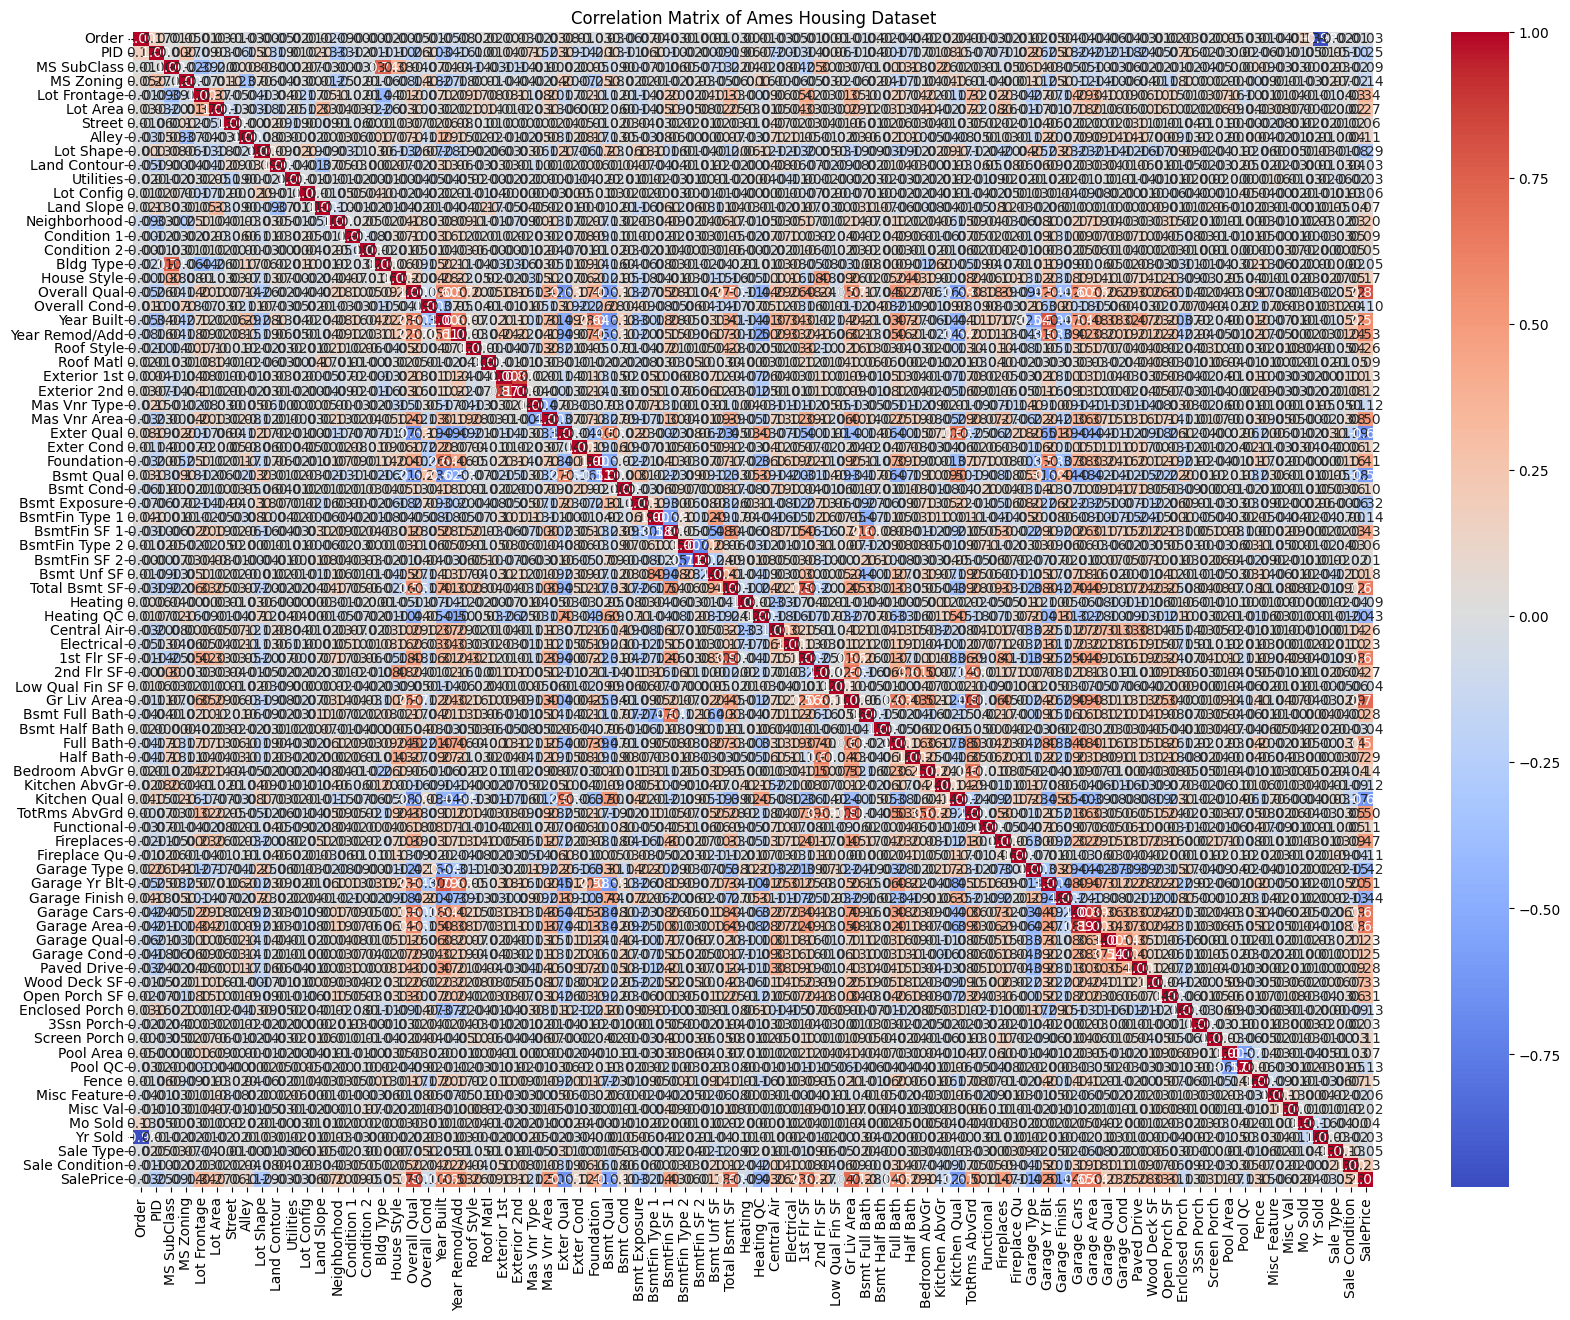

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_normalised is your normalized DataFrame
plt.figure(figsize=(20, 15))
correlation_matrix = df_normalised.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Ames Housing Dataset')
plt.show()


This tells us nothing, hence we need a more sophisticated way of selecting the features that we need

In [112]:
correlation_matrix = abs(correlation_matrix)
correlation_matrix['SalePrice'].sort_values(ascending=False)

#Set an index above which we consider a feature meaningful (I chose 0.5 but it can be anything)

features = correlation_matrix[correlation_matrix['SalePrice'] > 0.5].index
print(features)

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Exter Qual', 'Bsmt Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
       'Full Bath', 'Kitchen Qual', 'Garage Yr Blt', 'Garage Cars',
       'Garage Area', 'SalePrice'],
      dtype='object')


In [150]:
X = df_normalised[features]
X.drop(['SalePrice'], axis=1, inplace=True)
y = df_normalised['SalePrice']

<ipython-input-150-863b714e9a73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['SalePrice'], axis=1, inplace=True)


In [151]:
X.shape

(2930, 14)

In [152]:
y.shape

(2930,)

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)


(2051, 14) (2051,)
(439, 14) (439,)
(440, 14) (440,)


In [154]:
X_train.head()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,Garage Yr Blt,Garage Cars,Garage Area
1928,0.444444,0.601449,0.416667,0.0,3,5,0.197054,0.226213,0.202901,0.25,4,0.192308,0.2,0.208333
2497,0.444444,0.688406,0.283333,0.0,3,5,0.149264,0.127494,0.114356,0.25,4,0.230769,0.2,0.193548
261,0.444444,0.753623,0.433333,0.0,3,5,0.146318,0.117622,0.105501,0.25,4,0.259615,0.2,0.206989
1775,0.666667,0.978261,0.950000,0.0,2,2,0.224059,0.217391,0.194989,0.50,2,0.358974,0.4,0.406586
2587,0.444444,0.608696,0.100000,0.0,3,5,0.164484,0.140937,0.126413,0.25,4,0.195513,0.2,0.214382


#Training the neural network

In [155]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [156]:
no_features = X_train.shape[1]
print(no_features)

14


In [157]:
model = Sequential()
model.add(Input(shape=(no_features,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [158]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mean_squared_error',
    metrics=['RootMeanSquaredError']
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [159]:
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=2
)


Epoch 1/100
65/65 - 2s - 36ms/step - RootMeanSquaredError: 0.1634 - loss: 0.0267 - val_RootMeanSquaredError: 0.0710 - val_loss: 0.0050
Epoch 2/100
65/65 - 1s - 12ms/step - RootMeanSquaredError: 0.0551 - loss: 0.0030 - val_RootMeanSquaredError: 0.0584 - val_loss: 0.0034
Epoch 3/100
65/65 - 0s - 5ms/step - RootMeanSquaredError: 0.0491 - loss: 0.0024 - val_RootMeanSquaredError: 0.0543 - val_loss: 0.0029
Epoch 4/100
65/65 - 0s - 4ms/step - RootMeanSquaredError: 0.0485 - loss: 0.0023 - val_RootMeanSquaredError: 0.0536 - val_loss: 0.0029
Epoch 5/100
65/65 - 0s - 5ms/step - RootMeanSquaredError: 0.0451 - loss: 0.0020 - val_RootMeanSquaredError: 0.0514 - val_loss: 0.0026
Epoch 6/100
65/65 - 0s - 4ms/step - RootMeanSquaredError: 0.0436 - loss: 0.0019 - val_RootMeanSquaredError: 0.0513 - val_loss: 0.0026
Epoch 7/100
65/65 - 0s - 4ms/step - RootMeanSquaredError: 0.0432 - loss: 0.0019 - val_RootMeanSquaredError: 0.0540 - val_loss: 0.0029
Epoch 8/100
65/65 - 0s - 5ms/step - RootMeanSquaredError: 0.

In [160]:
train_loss = np.array(history.history['loss'])
val_loss = np.array(history.history['val_loss'])

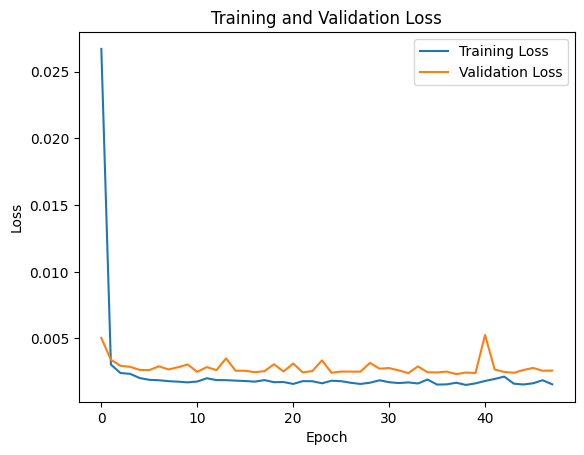

In [161]:
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [169]:
loss, rmse = model.evaluate(X_test, y_test, verbose=0)
print(f"Test RMSE: {rmse:.10f}")
# This means that the root mean squared error is 0.002673 but keep in mind that the original values were normalised between [0,1] so this means that the error is ~4.5%

Test RMSE: 0.0453967042


In [168]:
random_index = np.random.randint(0, len(X_test))
random_house = X_test.iloc[[random_index]]
y_true = y_test.iloc[random_index]
y_pred = model.predict(random_house)
print(random_house, y_true)
print(y_pred)

print(f"In this example |{y_true} - {y_pred}| = {abs(y_true-y_pred)} i.e. the error in this particular prediction is {100*abs(y_true-y_pred)}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
      Overall Qual  Year Built  Year Remod/Add  Mas Vnr Area  Exter Qual  \
2509      0.666667    0.963768        0.916667           0.0           2   

      Bsmt Qual  Total Bsmt SF  1st Flr SF  Gr Liv Area  Full Bath  \
2509          2         0.0982    0.039067      0.16315        0.5   

      Kitchen Qual  Garage Yr Blt  Garage Cars  Garage Area  
2509             2       0.352564          0.4     0.322581   0.1769887538718774
[[0.21337584]]
In this example |0.1769887538718774 - [[0.21337584]]| = [[0.03638708]] i.e. the error in this particular prediction is [[3.63870827]]%
